## S&P Global - AUTOMATIC BASELINE CORRECTION
### Misael M. Morales, Carlos Torres-Verdin, and Michael Pyrcz, UT-Austin; Murray Christie, Vladimir Rabinovich, S&P Global
#### 2024, Digital Reservoir Characterization Technology (DiReCT)
***

In [ ]:
from auto_baseline_correction import *

***
# LOG ANALYSIS
***

In [ ]:
# instantiate the LogAnalysis class
spl = SPLogAnalysis()
spl.__dict__

In [ ]:
# ### WARNING: this takes a long time to run, only do it if you need to
# headers = spl.read_all_headers()

# Plot the spatial distribution of wells and the selected property
spl.plot_ccs_sand_wells(figsize=(8,3), value='POROSITY', cmap='jet')

# Plot a well deviation survey for a given well
spl.plot_survey(figsize=(10,3), fname='427064023000_DIRSUR_NAD27(USFEET)US-SPC27-EXACT(TX-27SC).TXT')

# Plot the full well log with multiple tracks
# also plots the autocorrelation plot and ARIMA model curve
spl.plot_well(figsize=(10,8), well_name='17700004060000', curve='SP', order=(5,1,0))

***
# SP BASELINE CORRECTION
***

In [ ]:
# instanstiate the BaselineCorrection class
blc = BaselineCorrection()
blc.__dict__

In [ ]:
# Load the .LAS files from scratch (preload=False). 
# This means you don't have a pre-existing .npy file with the pre-loaded data.
# The .LAS files are in your 'data' folder, and this will output a log_data.npy file with the preprocessed logs.
blc.load_logs(preload      = True,                  #change me to False if you don't have a pre-existing .npy file 
              preload_file = 'Data/log_data.npy',   #change me (if preload_file is not 'Data/log_data.npy')
              folder       = 'Data/UT Export 9-19', #change me (if preload folder is not 'Data/UT Export 9-19' and preload=False)
              save_file    = 'Data/log_data.npy',   #change me to save your preprocessed raw logs [.LAS -> .npy]
              showfig      = True,
              )

# Process the numpy logs. 
# This will scale the data according to the chosen scaler, and perform random train_test_split
# scaler can be either ('standard', 'minmax', or 'none')
blc.scale_and_random_split(scaler='standard', 
                           test_size=0.227, 
                           showfig=True,
                          )

# Make the baseline correction NN model.
# If pretrained:
#    - the model will be loaded from the file pretrained='baseline_correction_model.keras'
# Else:
#    - we construct a model from scratch based on the auxiliary functions in the class
#    - and train the model on the training data
blc.make_model(pretrained   = 'baseline_correction_model.keras', #change me to None to train from scratch
               show_summary = False, 
               kernel_size  = 15, 
               dropout      = 0.2,
               depths       = [16,32,64], 
               optimizer    = 'adam',
               lr           = 1e-3,
               loss         = 'mse',
               metrics      = ['mse'],
               epochs       = 100,
               batch_size   = 30,
               valid_split  = 0.25,
               verbose      = True,
               figsize      = (10,5),
               )

# Make predictions on the test data and visualize results
blc.make_predictions(showfig=True, xlim=(-5,5))

***
# Transfer Learning Baseline Correction
***

In [8]:
from auto_baseline_correction import *
blc = BaselineCorrection()
blc.load_logs(preload      = True,                  #change me to False if you don't have a pre-existing .npy file 
              preload_file = 'Data/log_data.npy',   #change me (if preload_file is not 'Data/log_data.npy')
              folder       = 'Data/UT Export 9-19', #change me (if preload folder is not 'Data/UT Export 9-19' and preload=False)
              save_file    = 'Data/log_data.npy',   #change me to save your preprocessed raw logs [.LAS -> .npy]
              showfig      = False,
              )
blc.scale_and_random_split(scaler='standard', 
                           test_size=0.227, 
                           showfig=False,
                          )
blc.make_model(pretrained   = 'baseline_correction_model.keras', #change me to None to train from scratch
               show_summary = False, 
               kernel_size  = 15, 
               dropout      = 0.2,
               depths       = [16,32,64], 
               optimizer    = 'adam',
               lr           = 1e-3,
               loss         = 'mse',
               metrics      = ['mse'],
               epochs       = 100,
               batch_size   = 30,
               valid_split  = 0.25,
               verbose      = False,
               figsize      = (10,5),
               )
blc.make_predictions(showfig=False, xlim=(-5,5))


 ------------------------------  Baseline Correction Tool  ------------------------------
Tensorflow built with CUDA? True
# GPU available: 1
CUDA: 12.2 | cuDNN: 8
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU') 
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
------------------------------------------------------------
Well logs raw: (389, 44055, 3)
Well logs with Depth Derivative: (389, 44055, 4)
Well logs with Autocorrelation: (389, 44055, 5)
Well logs with Detrend Filter: (389, 44055, 6)
Well logs with Fourier Transform: (389, 44055, 7)
Well logs with Hilbert Transform: (389, 44055, 8)
Well logs with Symmetric IIR Filter: (389, 44055, 9)
Well logs with Savitzky-Golay Filter: (389, 44055, 10)
Well logs with Cubic Spline: (389, 44055, 11)
------------------------------------------------------------
X_train: (300, 44055, 10) | X_test: (89, 44055, 10)
y_train: (300, 44055, 1) | y_test: (89, 44055, 1)
--------------------------------------------------

2024-03-05 22:15:15.437034: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-05 22:15:15.482970: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: Permission denied
2024-03-05 22:15:15.597903: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: Permission denied


3/3 [==============================] - 1s 660ms/step
--------------------------------------------------
X_train: (300, 44055, 10)  | y_train: (300, 44055, 1)
X_test:  (89, 44055, 10)   | y_test:  (89, 44055, 1)
y_train_pred: (300, 44055) | y_test_pred: (89, 44055)
--------------------------------------------------
Train MSE: 0.1362 | Test MSE: 0.1292
------------------------------------------------------------


In [9]:
# instantiate the TransferLearning-BaselineCorrection class
tlc = TransferLearning()
tlc.__dict__


 ------------------------------  Baseline Correction Tool  ------------------------------
Tensorflow built with CUDA? True
# GPU available: 1
CUDA: 12.2 | cuDNN: 8
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU') 
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
------------------------------------------------------------


{'log_length': 44055,
 'folder': 'Data/UT Export 9-19/',
 'scaler': 'standard',
 'bounds': [10, 90],
 'decimate': False,
 'decimate_q': 10,
 'dxdz': True,
 'hilbert': True,
 'detrend': True,
 'fourier': True,
 'fourier_window': [0.001, 0.025],
 'fourier_scale': 1000.0,
 'symiir': True,
 'symiir_c0': 0.5,
 'symiir_z1': 0.1,
 'savgol': True,
 'savgol_window': 15,
 'savgol_order': 2,
 'cspline': True,
 'spline_lambda': 0.0,
 'autocorr': True,
 'autocorr_method': 'fft',
 'autocorr_mode': 'same',
 'return_data': False,
 'verbose': True,
 'save_fig': True,
 'in_folder': 'Data/UT Export 9-19',
 'out_folder': 'Data/UT Export postprocess',
 'model': <keras.src.engine.functional.Functional at 0x7f627d705090>}

In [10]:
# Run SP* and Csh estimation
# Using the pre-trained model from the BaselineCorrection class, we can predict the baseline-correct SP log
# and the Csh for every well log in the data folder. The .LAS files are updated with the 2 new curves, and 
# saved in a 'postprocess' folder.
# # warning: very slow, only run if you need to
# tlc.make_transfer_prediction()

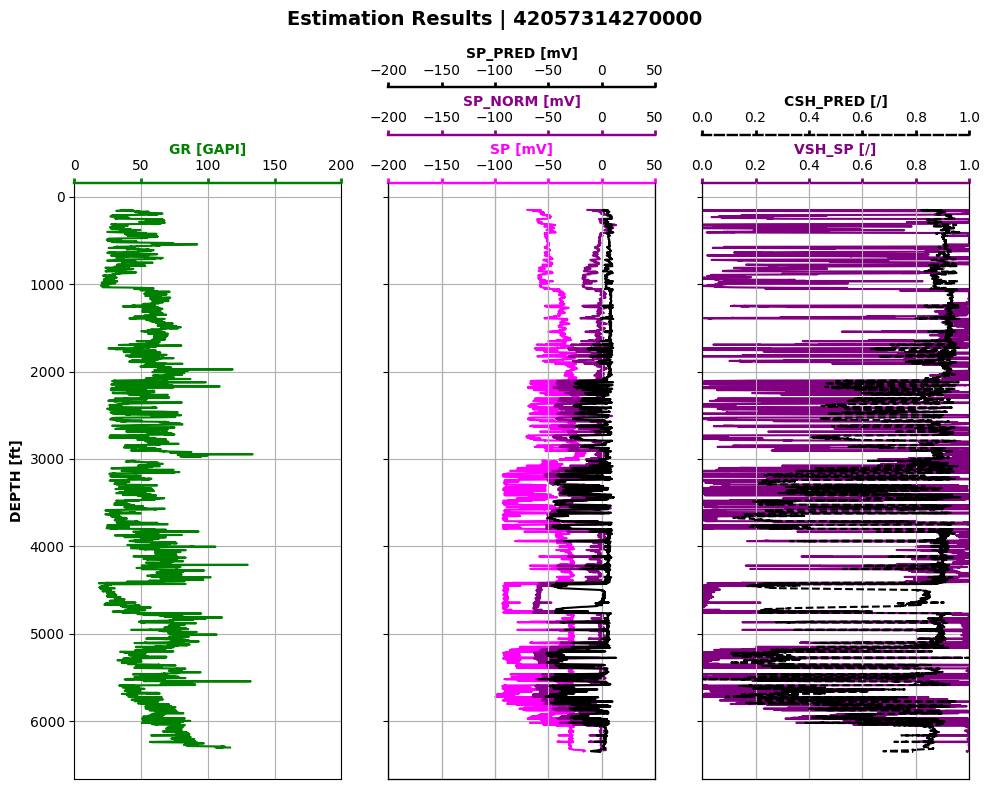

In [11]:
# Plot results of the SP baseline correction and Csh estimation for a given well
tlc.plot_transfer_results(filenum   = 69,
                          figsize   = (10,8),
                          showfig   = True,
                          add_title = True,
                        )

***
# END

In [ ]:
tlc.plot_transfer_results(filenum   = 69,
                          figsize   = (7,8),
                          showfig   = True,
                          add_title = False)

In [24]:
blc.logs_clean.shape

(389, 44055, 11)

In [50]:
blc.model.predict(blc.X_test[0:1])

1/1 [==============================] - 0s 419ms/step


array([[[0.3909018 ],
        [0.44497696],
        [0.23432983],
        ...,
        [0.20212796],
        [0.19223127],
        [0.        ]]], dtype=float32)

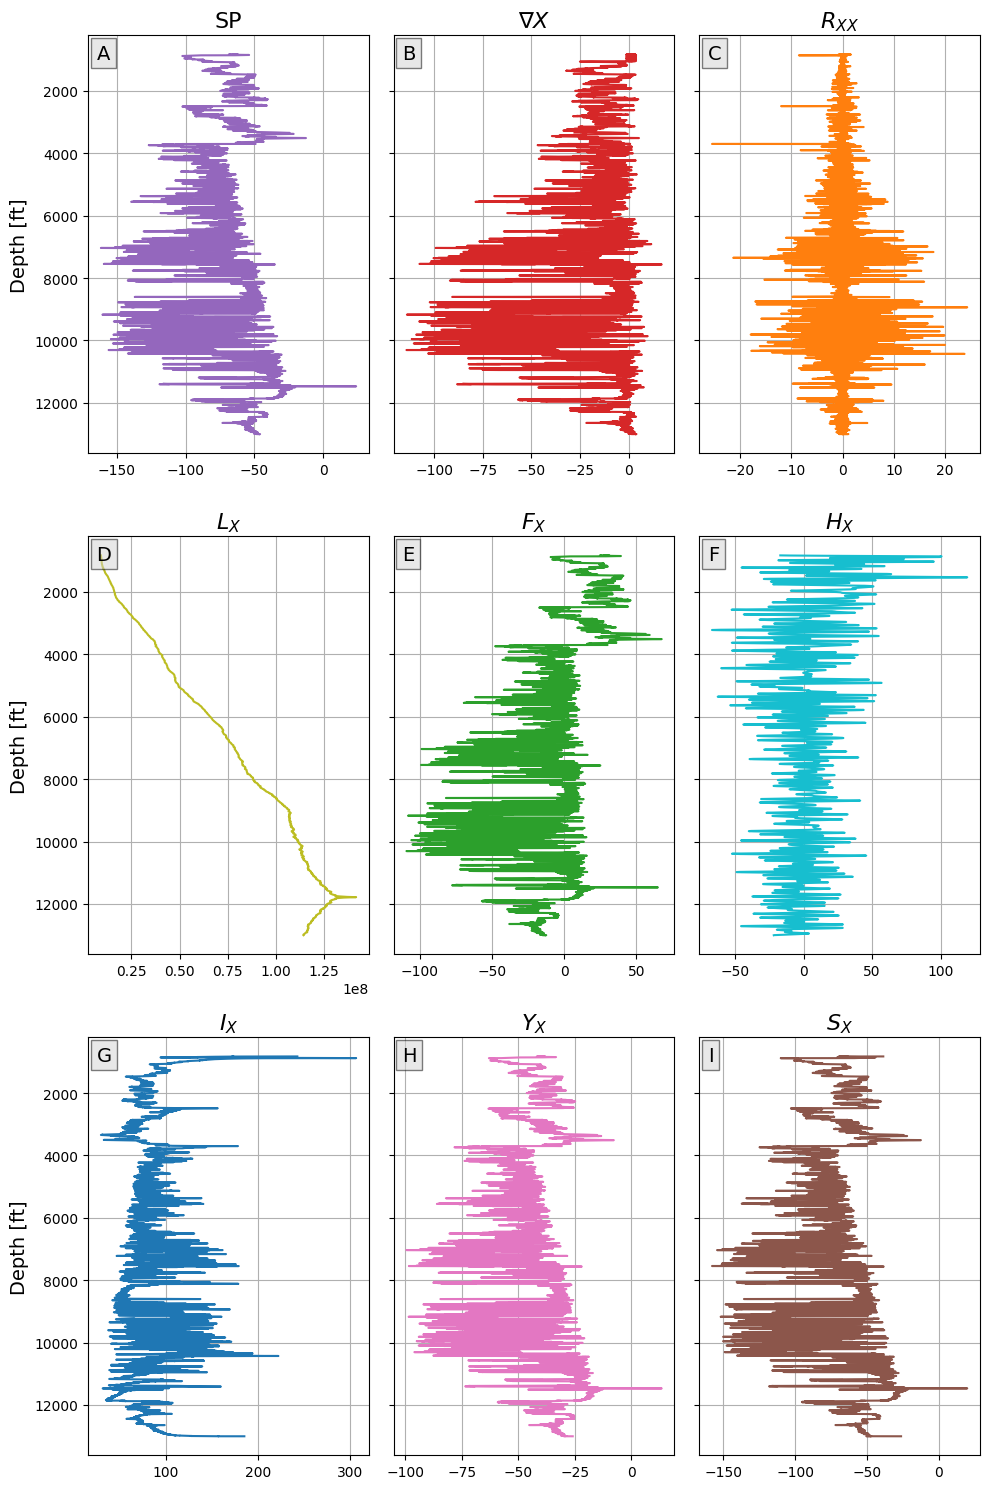

In [69]:
feature_names=['Depth','SP',r'$\nabla X$', r'$R_{XX}$',r'$L_X$','$F_X$', '$H_X$','$I_X$','$Y_X$','$S_X$']
colors=['tab:gray','tab:purple','tab:red','tab:orange','tab:olive','tab:green','tab:cyan','tab:blue','tab:pink','tab:brown']
labs = ['0','A','B','C','D','E','F','G','H','I','J']
fig, axs = plt.subplots(3, 3, figsize=(10, 15), sharey=True)

sample = 14
k = 1
for i in range(3):
    for j in range(3):
        x = blc.logs_clean[sample,:,k][blc.logs_clean[sample,:,1]!=0]
        z = blc.logs_clean[sample,:,0][blc.logs_clean[sample,:,1]!=0]
        axs[i,j].plot(x, z, color=colors[k])
        axs[i,j].text(0.03, 0.98, labs[k], transform=axs[i,j].transAxes, fontsize=14, verticalalignment='top', 
                                                    bbox=dict(facecolor='lightgrey', alpha=0.5))
        axs[i,j].set_title(feature_names[k], fontsize=16)
        axs[i,j].grid(True, which='both')
        k += 1
    axs[i,0].set_ylabel('Depth [ft]', fontsize=14)
axs[0,0].invert_yaxis()
plt.tight_layout()
plt.show()